### sklearn
* 데이터 사이언스 라이브러리
* 오랜 검증을 통한 안정성과 일관적 사용이 장점인 라이브러리
* 머신러닝의 7단계
    - 데이터수집
    - 데이터준비
    - 모델선정
    - 트레이닝
    - 평가
    - 튜닝
    - 예측
* EDA(Exploratory Data Analysis 탐색적 데이터 분석)
    - 과정
        - 분석목적및 데이터의 개별변수에 따른 설명
        - 전체적 데이터 확인: 결측치, 이상치,통계적 분포, 특성값)
        - 개별 속성값 관찰: 예측한 범위에 존재여부및 분포특성(정규분포)
        - 속성간의 관계성 분석(시각화): 상관관계가 존재하는가
        - 데이터 정제: 샘플 스페이스 일종의 가공* DS 극히 작음
        - 가설설정-> 검증
    - 방법
        - 개별데이터 분석 방법 head() tail() 
        - 통계적 분석 방법( 평균, 분산..)
        - 시각화 방법
        - 통계적 가설 검증
        - 머신러닝적 방법
            - 딥러닝활용
        

In [42]:
# 라이브러리 불러오기
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# 데이터셋 수집
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [32]:
# 데이터 성격 파악
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 데이터 성격 파악
    -Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica

In [33]:
print(len(iris['target']),len(iris['data']))

150 150


In [34]:
# 타겟
tgt=iris['target']
max(tgt)

2

In [35]:
# 특성데이터
data=iris['data']
data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [36]:
# 타겟의 성질
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
# 데이터의 성질(컬럼)
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
# 데이터 준비 
# 데이터 합치기
# 기본적 데이터 확인
cols=['slen','swid','plen','pwid']
idf=pd.DataFrame(data,columns=cols)
idf['target']=tgt
idf.tail()

,slen,swid,plen,pwid,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [39]:
# 기초 통계량 확인
idf.describe()

,slen,swid,plen,pwid,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 기본 분석결과
    - 데이터 량이 작다 150개 (BigData 가 아님> 딥러닝이 어려움)
    - 머신러닝(좁은의미)이나 통계적 처리만 가능
    - 결측치가 없다-> 별도의 처리 필요없음
    - 실수기반의 데이터와 정수기반의 타겟값-> 별도의 처리 필요없음
    - 타겟밸류가 순서대로 정렬되어 있음-> 셔플의 필요성
    - 별도의 검증용 데이터 없음 -> 학습용 테스트 데이터 분리의 필요성
    

In [ ]:
# 시각화를 통한  탐색적 자료 분석 준비

idf.plot()

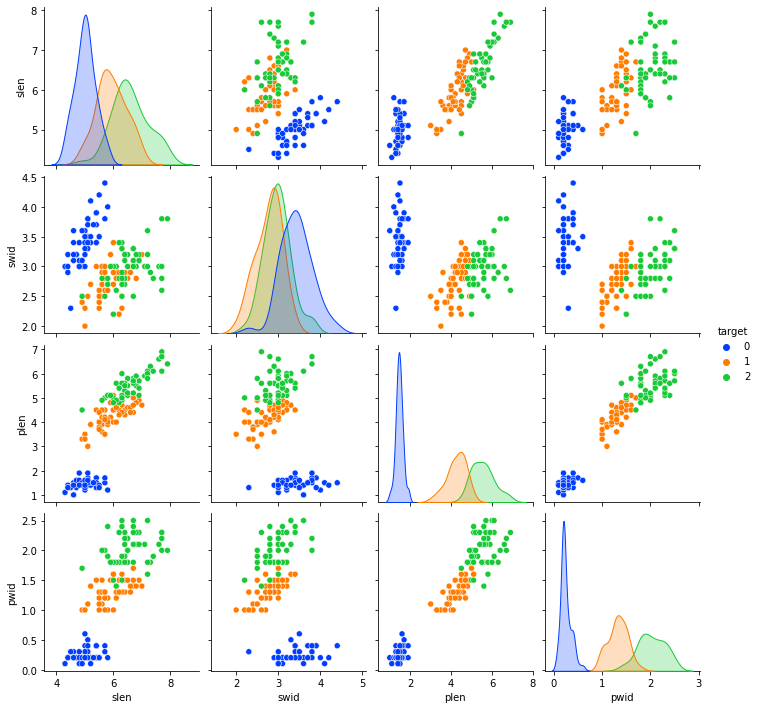

In [47]:
# 
sns.pairplot(idf,hue='target',palette='bright')

### 시각화를 통한 분석
    - 시각적 분리 가능
    - 종의 영향을 주는 요소 시각적 확인가능
    - 통계적 분리 일부 가능-> 딥러닝으로 하기엔 데이터 적어서 머신러닝
        - sklearn
    - 선그래프
        - 데이터의 정렬 상태: 셔플의 필요성
        - 일부 종의 분류에 영향을 주는 요소
    - 산점도
        - 확실하게 종의 분류에 영향을 주는 요소를 파악
        - 분석 기법 확정

    

### 분석방법: 머신러닝을 활용한 분석방법
* 테스트 결과 합격선인가로 판단
* 트레이닝셋과 테스트셋으로 분리
* 랜덤하게 테스트셋을 분리
    - 랜덤인덱스를 부여
    - 불린인덱스로 추출
* 라이브러리를 이용하는방법
    - from sklearn.model_selection import train_test_split
    - train_test_split(X,Y,test_size=0.25,random_state= 파라미터
        - X: 데이터값
        - Y: 타겟값(없으면 생략)
        - test_size: 테스트용 데이터 사이즈 0.25 기본
        - shuffle:True 기본값이나 주식등에서는 셔플하면 안된다
        - random_state: 모델작성시 동일 기준하에서 성능향상용으로 고정

In [58]:
# 정식적 데이터셋 분리 방법: 매우 복잡---> 라이브러리

randi=[]
for i in range(150):
    rint=np.random.randint(0,150)
    randi.append(rint)
randi
ridf=idf.copy()
ridf['rint']=randi
ridf50=ridf[ridf['rint']<50]
ridf50.describe()

,slen,swid,plen,pwid,target,rint
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,5.785246,3.049180,3.693443,1.180328,0.967213,20.967213
std,0.840007,0.454101,1.721130,0.746731,0.795135,14.094878
min,4.300000,2.200000,1.100000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.500000,0.300000,0.000000,9.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000,18.000000
75%,6.400000,3.200000,5.000000,1.800000,2.000000,31.000000
max,7.900000,4.400000,6.700000,2.500000,2.000000,49.000000


In [61]:
X=idf[['slen','swid','plen','pwid']].values
Y=idf['target'].values
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
# 데이터 준비
# train_test_split()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,shuffle=True,test_size=0.2,random_state=123)
#nres=np.array(res)
#nres.shape
print(type(X_train),X_train.shape,type(X_test),X_test.shape)
print(type(y_train),y_train.shape,type(y_test),y_test.shape)

<class 'numpy.ndarray'> (120, 4) <class 'numpy.ndarray'> (30, 4)
<class 'numpy.ndarray'> (120,) <class 'numpy.ndarray'> (30,)


#### 모델선정
    - 어느정도 수치에의한 분리가 가능한것을 시각화에서 확인
    - 수치기반으로 타겟 결정가능
    - 결정트리: 단계적 논리적 기준에 의한 분류


In [69]:
# 모델 준비 및 학습
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=123)
dtc.fit(X_train,y_train)


DecisionTreeClassifier(random_state=123)

In [70]:
# 모델을 평가
pred=dtc.predict(X_test)
pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

In [71]:
y_test

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

In [82]:
# 라이브러리 안쓰고 정밀도 판단
predf=pd.DataFrame(pred,columns=['pred'])
predf['label']=y_test
predf['diff']=predf['label']-predf['pred']
base=len(predf)
cor=len(predf[predf['diff']!=0])
cor/base

0.03333333333333333

In [83]:
# 라이브러리 써서 판단
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,y_test)
acc

0.9666666666666667

In [92]:
def dtcPrs(X_train,X_test,y_train,y_test):
    
    dtc=DecisionTreeClassifier() # 모델설정
    dtc.fit(X_train,y_train) # 트레이닝
    
    pred=dtc.predict(X_test) # 테스트 예측값 생성
    acc=accuracy_score(pred,y_test)
    print('명중률:',acc)
dtcPrs(X_train,X_test,y_train,y_test) 

명중률: 0.9666666666666667


In [100]:
def mldtcPrs(X,Y):
    X_train,X_test,y_train,y_test=train_test_split(X,Y,shuffle=True,test_size=0.2)
    dtcPrs(X_train,X_test,y_train,y_test)
mldtcPrs(X,Y)

명중률: 0.8


In [117]:
# knn 모델 사용
from sklearn.neighbors import KNeighborsClassifier
def knnPrs(X_train,X_test,y_train,y_test,param=2):
    knn=KNeighborsClassifier(n_neighbors=param) # 모델설정
    knn.fit(X_train,y_train) # 트레이닝
    # 평가
    pred=knn.predict(X_test) # 테스트 예측값 생성
    acc=accuracy_score(pred,y_test)
    print('knn 명중률:',acc)
    return acc
knnPrs(X_train,X_test,y_train,y_test) 

knn 명중률: 0.9


0.9

In [ ]:
# 튜닝
res=[]
for i in range(2,30):
    acc=knnPrs(X_train,X_test,y_train,y_test,param=i)
    res.append(res)
res

In [ ]:
plt.plot(res)

In [ ]:
# 예측모델 : 모델선정, 파라미터값